In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ursse.phase_space_trajectory as pst
# import ursse_cpp.sync_motion_sim as sm
from config_ursse import get_from_config, get_path_from_config, save_to_config
from ursse.path_assistant import PathAssistant
import os
import valstore as vt
images_dir = os.path.join(get_path_from_config("URSSE_sync_motion_note_dir"),
                          "images")
shift = PathAssistant('shift_05_28_2021')
np_rand_seed = 1
from ursse.data_processing import load_one_pickle

iota_period_sec = get_from_config("IOTA_revolution_period")

images_dir = os.path.join(get_path_from_config("URSSE_sync_motion_note_dir"),
                          "images")
from ursse.utils import normalize, myhist

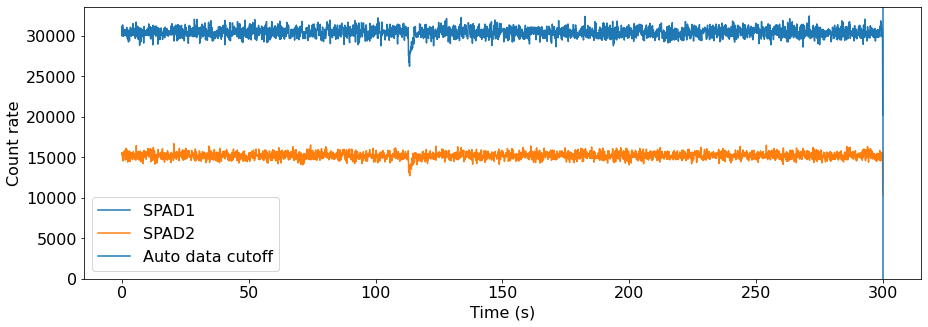

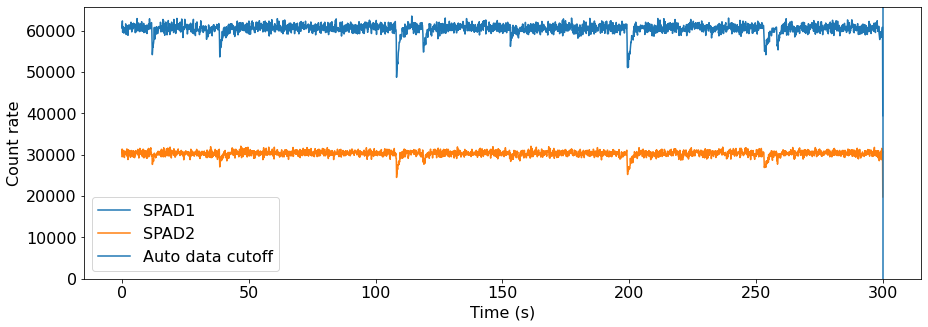

In [2]:
file_1el = '1el_002.ptu'
file_2el = '2el_003.ptu'
dic_1el = load_one_pickle(shift.get_pickle_path(file_1el))
dic_2el = load_one_pickle(shift.get_pickle_path(file_2el))

# Single electron

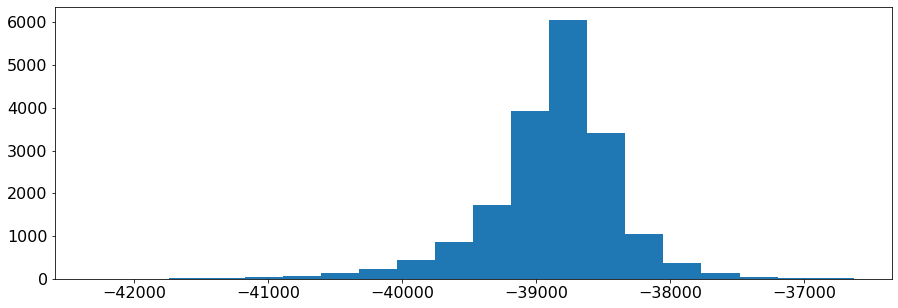

In [3]:
df_1el = dic_1el['clean_df'].reset_index(drop=True)
spad2_1el = df_1el[df_1el.diff()['revolution'] == 0]
spad1_1el = df_1el.iloc[(spad2_1el.index - 1), :]
coincidences_1el_df = pd.DataFrame({'delay1': spad1_1el['delay'].values,
                               'delay2': spad2_1el['delay'].values})
coincidences_1el_df['diff'] = coincidences_1el_df['delay1'] - coincidences_1el_df['delay2']
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(coincidences_1el_df['diff'], bins=20)
plt.show()
std_1el = np.std(coincidences_1el_df['diff'])

In [4]:
np.sqrt(300**2 + 400**2)

500.0

# Two electrons

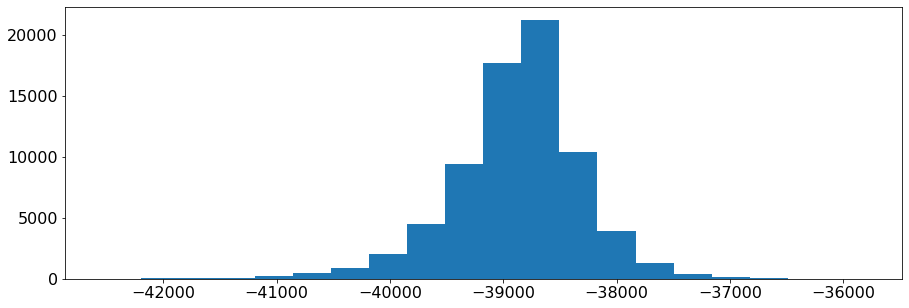

In [5]:
df_2el = dic_2el['clean_df'].reset_index(drop=True)
spad2_2el = df_2el[df_2el.diff()['revolution'] == 0]
spad1_2el = df_2el.iloc[(spad2_2el.index - 1), :]
coincidences_2el_df = pd.DataFrame({'delay1': spad1_2el['delay'].values,
                               'delay2': spad2_2el['delay'].values})
coincidences_2el_df['diff'] = coincidences_2el_df['delay1'] - coincidences_2el_df['delay2']
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(coincidences_2el_df['diff'], bins=20)
plt.show()
std_2el = np.std(coincidences_2el_df['diff'])

# Estimate of bunch length

In [6]:
st = np.sqrt(std_2el**2 - std_1el**2) # ps
st

277.8148705968768

In [7]:
std_1el, std_2el

(494.9221662426692, 567.5641399552087)

In [8]:
sz = 3e8 * st *1e-12 * 1e2 # cm
sz

8.334446117906303

In [9]:
from ursse.utils import normalize, myhist

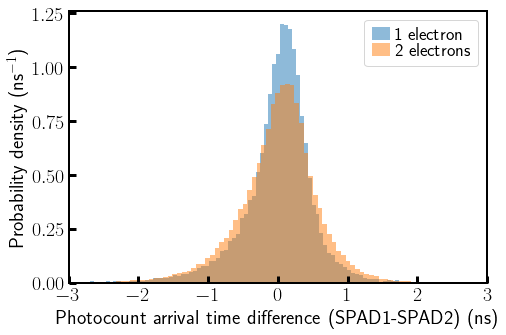

In [10]:
from ursse.path_assistant import get_plot_style_sheet
plt.style.use(get_plot_style_sheet("jinst"))
fig, ax = plt.subplots(figsize=(7.5,5))
tmean = np.mean(np.concatenate([coincidences_1el_df['diff'].values, coincidences_2el_df['diff'].values]))
ax.hist(1e-3*(coincidences_1el_df['diff'] - tmean), bins=100, density=True, alpha=0.5, label='1 electron')
ax.hist(1e-3*(coincidences_2el_df['diff'] - tmean), bins=100, density=True, alpha=0.5, label='2 electrons')
ax.set_ylabel('Probability density (ns$^{-1}$)')
ax.set_xlabel('Photocount arrival time difference (SPAD1-SPAD2) (ns)')
ax.legend()
ax.set_xlim(-3, 3)
fig.savefig('2_electrons.png',
            dpi=300, bbox_inches='tight')
plt.show()

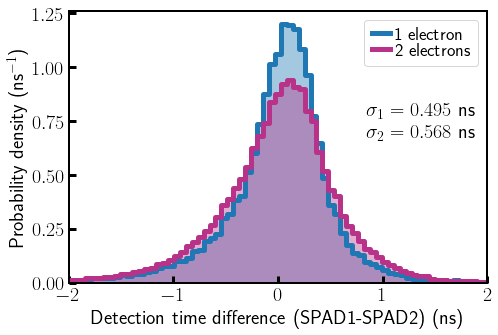

In [12]:
from ursse.path_assistant import get_plot_style_sheet
plt.style.use(get_plot_style_sheet("jinst"))
y1, bins = np.histogram(1e-3*(coincidences_1el_df['diff'] - tmean), bins=100)
y2, _ = np.histogram(1e-3*(coincidences_2el_df['diff'] - tmean), bins=bins)
x = (bins[1:] + bins[:-1])/2
y1 = normalize(y1)/(x[1]-x[0])
y2 = normalize(y2)/(x[1]-x[0])

from matplotlib import cm
colormap = cm.get_cmap("plasma")
purple = colormap(6/14)

fig, ax = plt.subplots(figsize=(7.5, 5))

myhist(ax, x, y1,
                label='1 electron',
                linewidth=5)
myhist(ax, x, y2, 
                label="2 electrons",
                linewidth=5, color=purple)
ax.set_xlim(-2, 2)
ax.set_ylim(0, ax.get_ylim()[1])
ax.legend()
ax.set_ylabel('Probability density (ns$^{-1}$)')
ax.set_xlabel('Detection time difference (SPAD1-SPAD2) (ns)')

for i, sig, pos in zip(["1", "2"], [std_1el, std_2el], [0.6, 0.52]):
    ax.text(0.97, pos, r"$\sigma_"+i+"=" + f"{1e-3*sig:.3f}" + r"$ ns",
         transform=ax.transAxes,
         va='bottom', ha='right')

fig.savefig(os.path.join(images_dir,
                             "arrival_time_difference.png"),
            dpi=300, bbox_inches='tight')
plt.show()